# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
data = pd.read_csv('/content/data.csv', encoding = 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Get Basic Informations

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


The descriptive statistics reveal significant variations in Quantity and UnitPrice, with noticeable outliers. Negative values in Quantity and UnitPrice likely stem from product returns or data entry errors, necessitating data cleaning. Price distribution is highly dispersed, with some high-priced products potentially being premium items or misrecorded entries.

In [5]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


# Cleaning Dataset

In [6]:
# Convert the InvoiceDate column to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Filling Null Descriptions Using Mode of StockCode and Dropping Remaining Missing Values

In [8]:
non_repeated_values = data[data['Description'].isnull()]['StockCode']

for i in non_repeated_values:

  mode_description = data[data['StockCode'] == i]['Description'].mode()

  if not mode_description.empty:
    # Fill null 'Description' values with the mode value

    data.loc[(data['StockCode'] == i) & (data['Description'].isnull()), 'Description'] = mode_description[0]

data.dropna(subset=['Description'], inplace=True)

This script identifies rows where the 'Description' column has null values. For each StockCode with missing descriptions, the script calculates the mode (most frequent value) of the 'Description' for that specific StockCode. If a valid mode is found, the missing values are filled with the mode. After this process, rows still containing null values in the 'Description' column are dropped.

## Dropp Null Values in CustomerID Column

In [9]:
data.dropna(subset = ['CustomerID'], inplace =True)

In [10]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [11]:
data.shape

(406829, 8)

## Checking Duplicate Values

In [12]:
data.duplicated().sum()

np.int64(5225)

In [13]:
data.drop_duplicates(inplace = True)

In [14]:
data.duplicated().sum()

np.int64(0)

## Handling the negative values and Outliers in UnitPrice and Quantity Columns

The IQR method was applied to handle outliers in key numerical columns, such as UnitPrice, Quantity, and Revenue. The Interquartile Range (IQR) method is one of the most commonly used statistical approaches to detect and handle outliers in numerical data. IQR measures the spread of the middle 50% of the dataset, specifically the range between the first quartile (Q1) and third quartile (Q3).

Reasons why IQR is suitable for outlier treatment:

1. Resistant to Extreme Values: Unlike mean-based methods (e.g., z-score), IQR is not influenced by extreme values, making it a robust approach for datasets with non-normal distributions.

2. Simple Yet Effective: IQR is easy to compute and interpret, making it ideal for initial data exploration and preprocessing.

3. Well-Suited for E-Commerce Data: In e-commerce datasets, transaction values can vary significantly due to bulk purchases or data entry errors. IQR helps flag unreasonable values without discarding valid business patterns

### UnitPrice

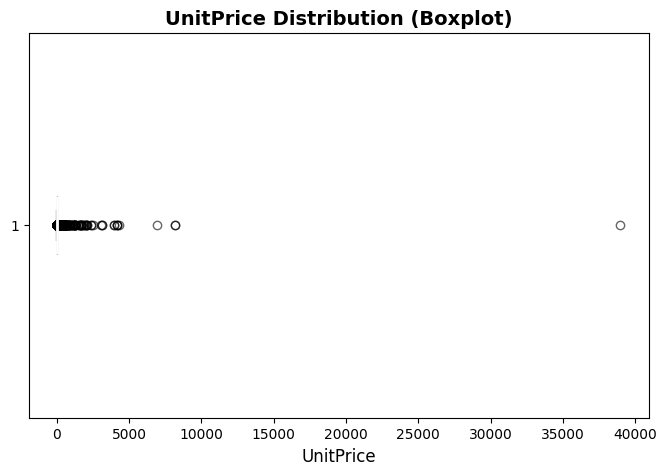

In [15]:
# Create a boxplot for UnitPrice column
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
plt.boxplot(data['UnitPrice'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="darkcyan", color="black"),
            medianprops=dict(color="white", linewidth=2),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", color="red", alpha=0.6))

# Set title and labels
plt.title('UnitPrice Distribution (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('UnitPrice', fontsize=12)

# Show the plot
plt.show()

In [16]:
# Calculate the Interquartile Range (IQR) for UnitPrice
q1 = data['UnitPrice'].quantile(.25)
q3 = data['UnitPrice'].quantile(.75)
IQR = q3 - q1

# Define lower and upper bounds for outlier detection
lowerbound = q1 - 1.5 * IQR
upperbound = q3 + 1.5 * IQR

# Filter the dataset to remove outliers
data=data[(data['UnitPrice'] > lowerbound) & (data['UnitPrice'] < upperbound)]

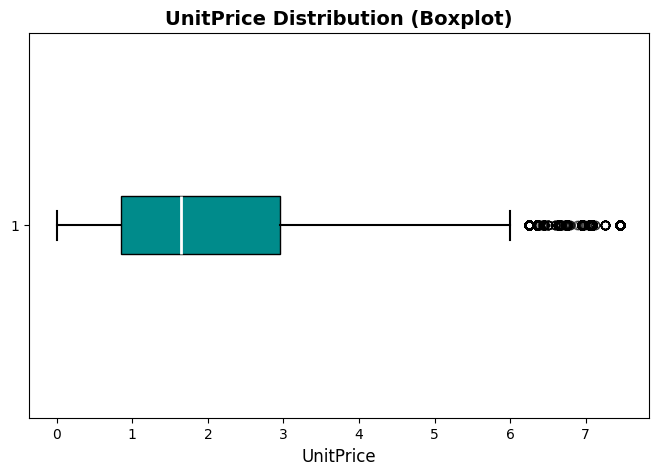

In [17]:
# Create a boxplot for UnitPrice column
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
plt.boxplot(data['UnitPrice'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="darkcyan", color="black"),
            medianprops=dict(color="white", linewidth=2),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", color="red", alpha=0.6))

# Set title and labels
plt.title('UnitPrice Distribution (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('UnitPrice', fontsize=12)

# Show the plot
plt.show()

### Quantity

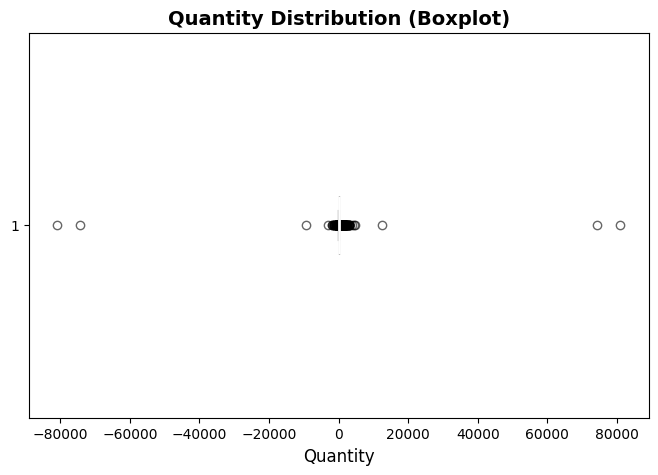

In [18]:
# Create a boxplot for Quantity column
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
plt.boxplot(data['Quantity'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="darkcyan", color="black"),
            medianprops=dict(color="white", linewidth=2),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", color="red", alpha=0.6))

# Set title and labels
plt.title('Quantity Distribution (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontsize=12)

# Show the plot
plt.show()

In [19]:
# Calculate the Interquartile Range (IQR) for Quantity
q1 = data['Quantity'].quantile(0.25)
q3 = data['Quantity'].quantile(0.75)
IQR = q3 - q1

# Define lower and upper bounds for outlier detection
lowerbound = q1 - 1.5 * IQR
upperbound = q3 + 1.5 * IQR

# Menghapus outlier (termasuk semua nilai negatif)
data = data[(data['Quantity'] >= 0) & (data['Quantity'] >= lowerbound) & (data['Quantity'] <= upperbound)]

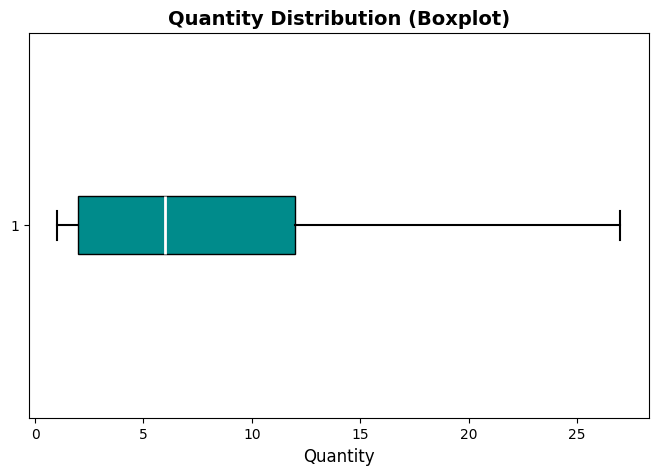

In [20]:
# Create a boxplot for Quantity column
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
plt.boxplot(data['Quantity'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="darkcyan", color="black"),
            medianprops=dict(color="white", linewidth=2),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", color="red", alpha=0.6))

# Set title and labels
plt.title('Quantity Distribution (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontsize=12)

# Show the plot
plt.show()

In [21]:
data[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,332691.000000,332691.000000
mean,7.559086,2.184860
std,6.779287,1.531618
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.650000
75%,12.000000,2.950000
max,27.000000,7.460000


## Add Columns that Needed

In [22]:
data['Revenue'] = data['UnitPrice'] * data['Quantity']

In [23]:
# Add additional columns to the dataset containing more detailed time-related information such as year, month, quarter which will be used for further analysis
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')

L = ['year', 'month', 'quarter']
data = data.join(pd.concat((getattr(data['InvoiceDate'].dt, i).rename(i) for i in L), axis = 1))

In [24]:
# Add a new column named yearmonth by combining the year and month columns from InvoiceDate.
data.insert(loc=2, column='yearmonth', value=data['InvoiceDate'].map(lambda x: 100*x.year + x.month))

In [25]:
data.head()

,InvoiceNo,StockCode,yearmonth,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,MonthYear,year,month,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,4
1,536365,71053,201012,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,4


# Exploratory Data Analyst (EDA)

In [26]:
# Consolidating number of sales made by customer for each country
sales_per_cust = data.groupby(['CustomerID', 'Country'], as_index = False)['InvoiceNo'].count().sort_values(by = 'InvoiceNo', ascending = False)
sales_per_cust.columns = ['CustomerID', 'Country', 'NumberOfSales']
sales_per_cust.head()

,CustomerID,Country,NumberOfSales
3891,17841.0,United Kingdom,7204
1835,14911.0,EIRE,4472
1258,14096.0,United Kingdom,4415
330,12748.0,United Kingdom,4044
1621,14606.0,United Kingdom,2422


This script groups the data by 'CustomerID' and 'Country' to count the number of sales made by each customer in each country. The results are sorted by the number of sales (InvoiceNo), highlighting customers with the highest number of transactions. This helps to understand sales distribution across customers and countries.

## Revenue Analysis

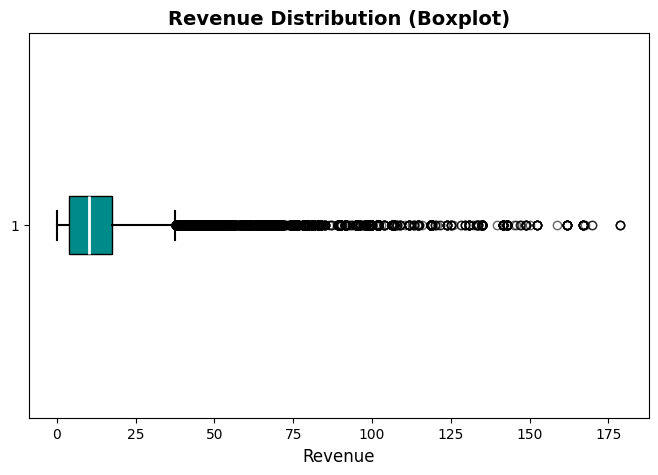

In [27]:
# Create a boxplot for Revenue with customized color
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
plt.boxplot(data['Revenue'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="darkcyan", color="black"),
            medianprops=dict(color="white", linewidth=2),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", color="red", alpha=0.6))

# Set title and labels
plt.title('Revenue Distribution (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('Revenue', fontsize=12)

# Show the plot
plt.show()

As illustrated in the boxplot, several significant outliers are present on the right side of the distribution. These outliers correspond to revenue values that are substantially higher than the majority of the other data points.

Outliers can distort the accuracy of key statistical measures, such as the mean and standard deviation, leading to potential misinterpretations of business performance. For instance, an inflated average revenue due to the presence of outliers may create a misleading perception that the business is performing better than it actually is.

When business decisions are based on data that contains outliers, there is a risk that these decisions may be flawed or even counterproductive. For example, the influence of exceptionally high revenue from outliers could result in overly ambitious investments, while the actual business performance may not justify such actions.

In [28]:
# Calculate the Interquartile Range (IQR) for Revenue
q1 = data['Revenue'].quantile(0.25)
q3 = data['Revenue'].quantile(0.75)
IQR = q3 - q1

# Define lower and upper bounds for outlier detection
lowerbound = q1 - 1.5 * IQR
upperbound = q3 + 1.5 * IQR

# Filter dataset to remove extreme outliers
data = data[(data['Revenue'] >= lowerbound) & (data['Revenue'] <= upperbound)]

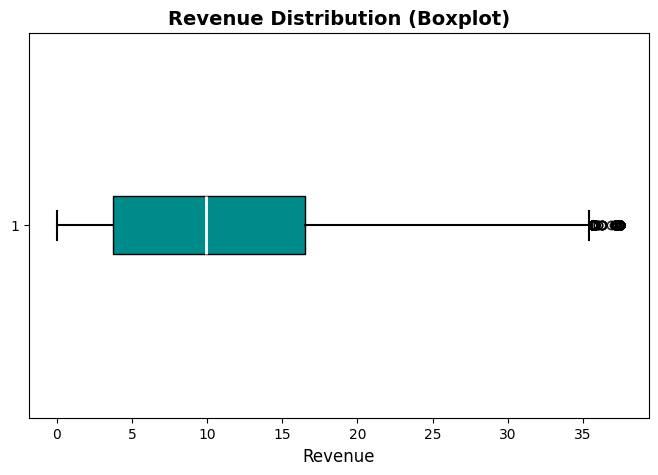

In [29]:
# Create a boxplot for Revenue with customized color
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
plt.boxplot(data['Revenue'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="darkcyan", color="black"),
            medianprops=dict(color="white", linewidth=2),
            whiskerprops=dict(color="black", linewidth=1.5),
            capprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker="o", color="red", alpha=0.6))

# Set title and labels
plt.title('Revenue Distribution (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('Revenue', fontsize=12)

# Show the plot
plt.show()

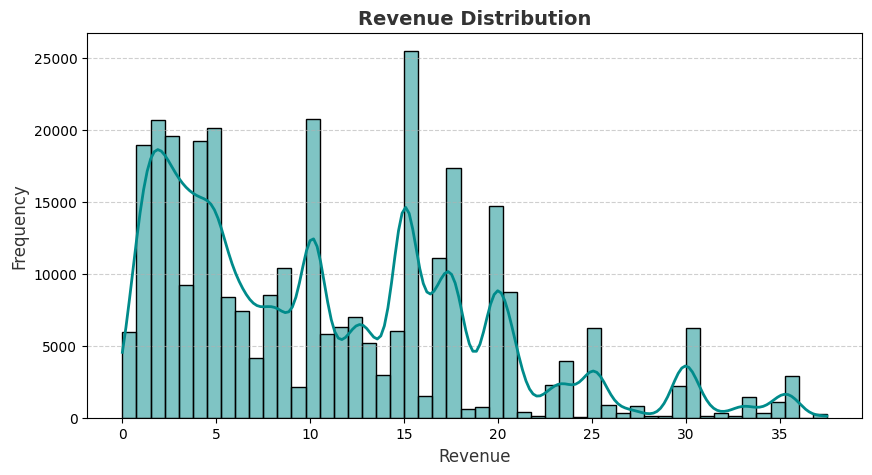

In [30]:
# Revenue Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Revenue'], bins=50, kde=True, color='#008B8B', line_kws={'color': '#FF8C00', 'linewidth': 2})
plt.title('Revenue Distribution', fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Revenue', fontsize=12, color='#333333')
plt.ylabel('Frequency', fontsize=12, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

The revenue distribution follows a right-skewed pattern, where the majority of transactions generate relatively low revenue, while a smaller subset contributes to significantly higher values. This trend is common in e-commerce, where most customers make small to moderate purchases, whereas a select group of high-value customers accounts for a disproportionate share of total revenue.

The presence of multiple peaks in the histogram may indicate pricing tiers, distinct customer purchasing behaviors, or the influence of promotional campaigns. These peaks could correspond to specific product price points or bulk purchasing trends among certain customer segments.

## Period Analysis

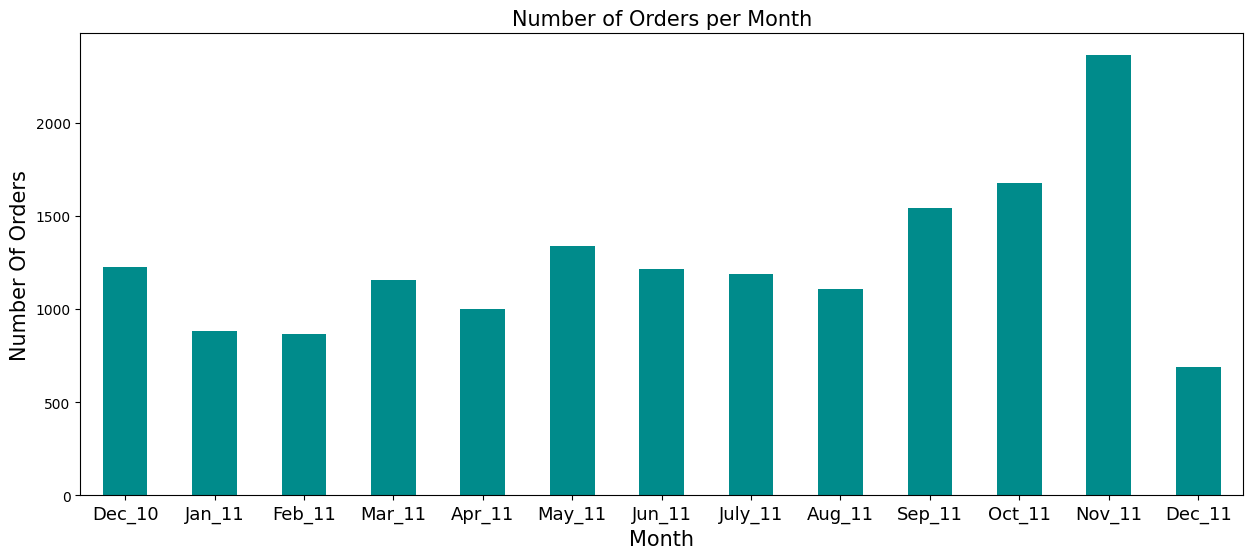

In [31]:
# Number of order by month
ax = data.groupby('InvoiceNo')['yearmonth'].unique().value_counts().sort_index().plot(kind = 'bar', color = 'DarkCyan', figsize = (15,6))
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Number Of Orders', fontsize = 15)
ax.set_title('Number of Orders per Month', fontsize =15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

The bar chart illustrates the monthly trend in the number of orders over a one-year period. A clear upward trend is observed, particularly in the last quarter of the year, with November 2011 recording the highest number of orders. This spike is likely driven by seasonal promotions, holiday shopping behavior, or marketing campaigns that encourage higher customer spending.

The beginning of the year (January – February 2011) shows relatively lower order volumes, possibly due to a post-holiday sales decline or reduced consumer spending. Meanwhile, the sharp drop in December 2011 is explained by the fact that the dataset only includes transactions up to December 9, 2011, meaning the data for the rest of the month is missing. This suggests that the actual number of orders for December could have been significantly higher if complete data were available.

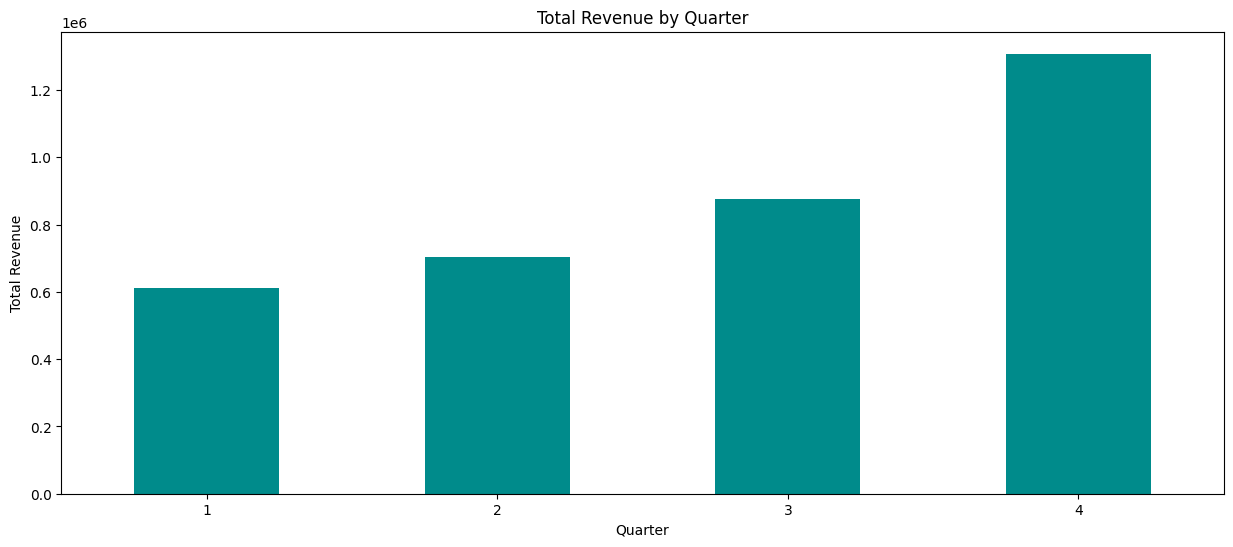

In [32]:
# Total revenue by quarter
quarterly_revenue = data.groupby('quarter')['Revenue'].sum()
quarterly_revenue.plot(kind='bar', color='DarkCyan', figsize=(15, 6))
plt.title('Total Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

The bar chart presents the total revenue generated per quarter, showcasing a consistent upward trend throughout the year. The first and second quarters recorded relatively stable revenue levels, followed by a significant increase in Q3 and a sharp surge in Q4.

The substantial revenue growth in Q4 could be attributed to seasonal sales events, holiday shopping behavior, or strategic marketing campaigns that drive higher purchase volumes. This trend is common in e-commerce, where customers tend to spend more during major sales periods such as Black Friday, Cyber Monday, and Christmas promotions.

## Analysis by Country

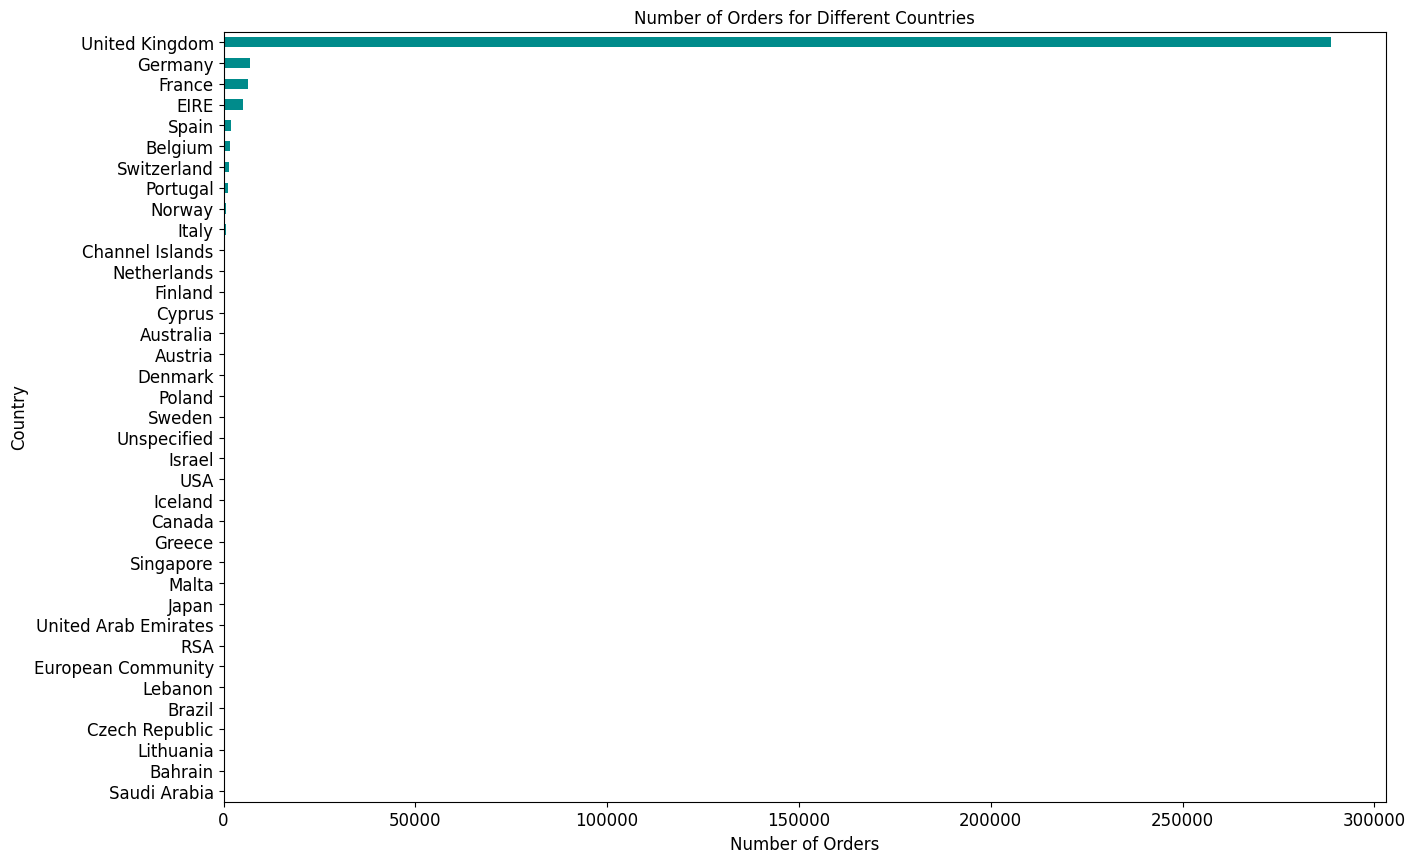

In [33]:
group_country_orders = data.groupby('Country')['InvoiceDate'].count().sort_values()

# Plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,10))
group_country_orders.plot(kind='barh', fontsize=12, color='DarkCyan')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for Different Countries', fontsize=12)
plt.show()

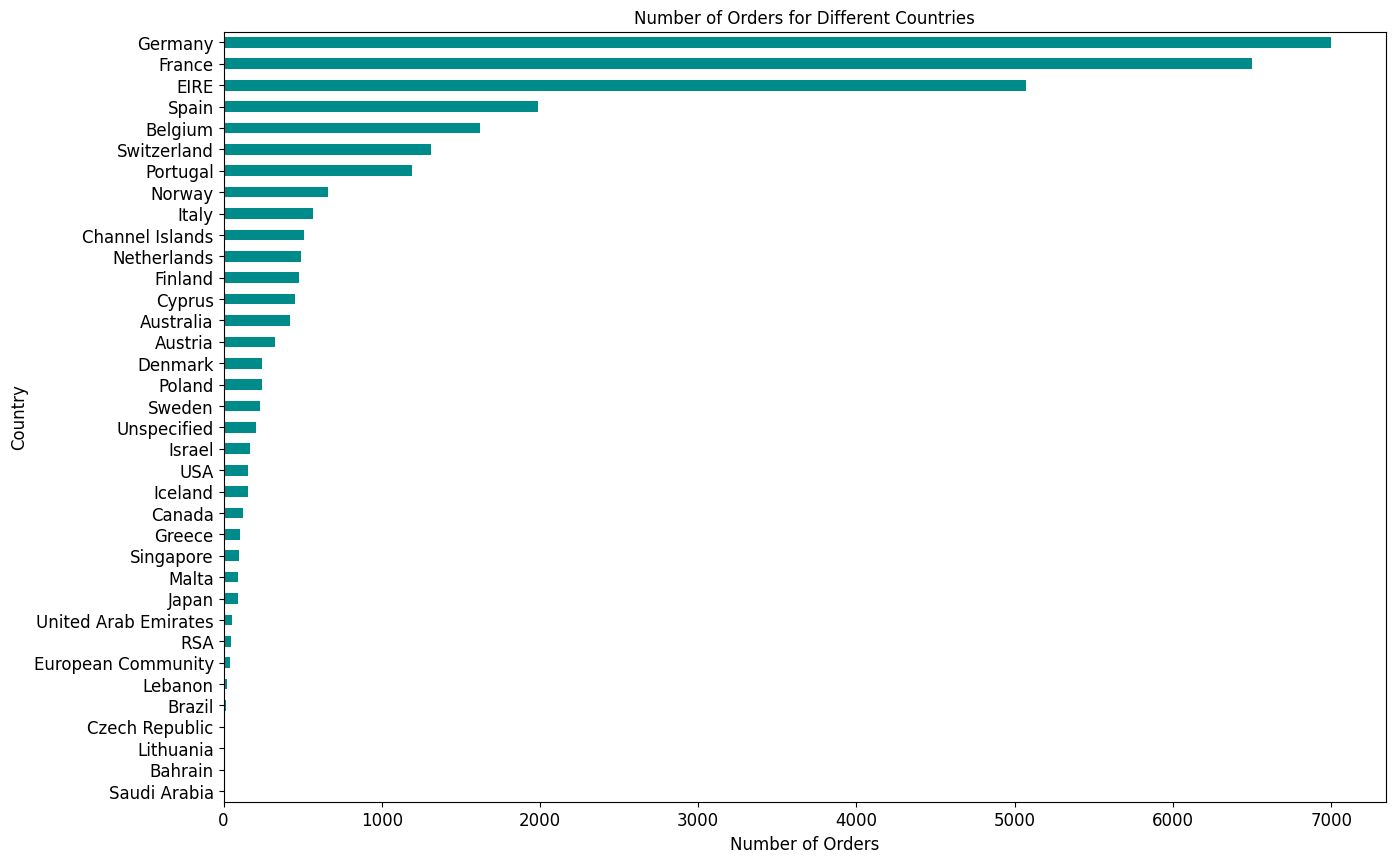

In [34]:
# Without UK
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

# Plot number of unique customers in waxh country (without UK)
plt.subplots(figsize=(15,10))
group_country_orders_without_uk.plot(kind='barh', fontsize=12, color='DarkCyan')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for Different Countries', fontsize=12)
plt.show()

Based on the graph above, the highest number of orders comes from customers in three European countries: Germany, France, and Ireland. However, upon closer analysis, other countries also show a considerable number of orders. Even some countries in Asia, such as Japan and Singapore, contribute to the total orders, although not as much as European countries. This indicates that market expansion, especially outside of Europe, remains a viable opportunity.

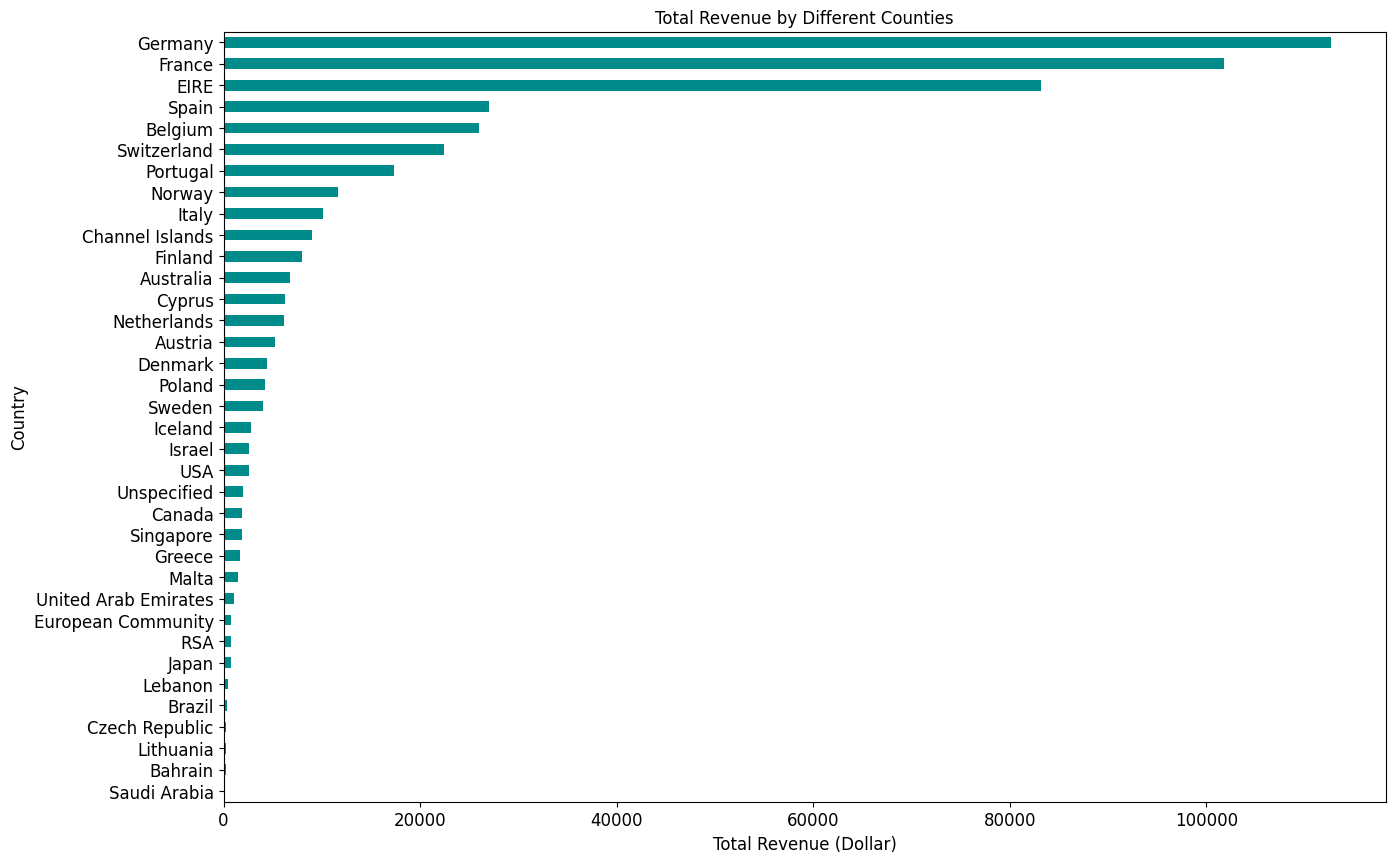

In [35]:
# Amount spent by each country (without UK)
group_revenue_per_country = data.groupby('Country')['Revenue'].sum().sort_values()
del group_revenue_per_country['United Kingdom']

# Plot total spent by each country (Without UK)
plt.subplots(figsize=(15,10))
group_revenue_per_country.plot(kind='barh', fontsize=12, color='DarkCyan')
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Total Revenue by Different Counties', fontsize=12)
plt.show()

The graph presents total revenue by country, with the Netherlands, Ireland, Germany, France, and Australia being the largest contributors. The dominance of European countries is evident, although some non-European countries, such as Japan and Singapore, also appear on the list, indicating potential growth opportunities in the Asia-Pacific region. Meanwhile, the presence of the "Unspecified" category suggests transaction data without clear location information, which may be due to data entry errors. Additionally, countries with lower revenue, such as Brazil and Bahrain, may have less developed markets or face challenges in distribution and demand. Overall, the graph provides an overview of revenue distribution across regions, highlighting both opportunities and challenges in different markets.

# RFM Analysis

In [36]:
import datetime as dt

In [37]:
# Define the reference date (assumed as the last date in the dataset)
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [38]:
reference_date = dt.datetime(2011,12,10)

This step is part of the Recency (R) calculation in RFM analysis, where "data['InvoiceDate'].max( )" is used to retrieve the latest transaction date in the dataset as the calculation basis, followed by the variable "reference_date = dt.datetime(2011,12,10)" which sets the reference date to one day after the latest transaction to ensure all customers have a positive or zero Recency value, and the "reference_date" value is then used to calculate the difference between the reference date and the customer's last transaction date, resulting in the Recency value that indicates how recently a customer made their last transaction.

In [39]:
# Calculate RFM Metrics for Each Customer
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (reference_date - x.max()).days,
    'InvoiceNo' : 'count',
    'Revenue' : 'sum'
}).reset_index()

In [40]:
rfm

,CustomerID,InvoiceDate,InvoiceNo,Revenue
0,12347.0,2,155,2783.37
1,12348.0,248,6,90.20
2,12349.0,18,56,924.75
3,12350.0,310,16,294.40
4,12352.0,36,66,1130.94
...,...,...,...,...
4141,18280.0,277,8,137.00
4142,18281.0,180,5,46.92
4143,18282.0,7,8,113.13
4144,18283.0,3,717,2002.63


In [41]:
# Rename Columns for Clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [42]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,155,2783.37
1,12348.0,248,6,90.20
2,12349.0,18,56,924.75
3,12350.0,310,16,294.40
4,12352.0,36,66,1130.94
...,...,...,...,...
4141,18280.0,277,8,137.00
4142,18281.0,180,5,46.92
4143,18282.0,7,8,113.13
4144,18283.0,3,717,2002.63


In [43]:
# Normalize RFM Scores Using Quintiles (1-5)
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method = 'first'), 5, labels = [1, 2, 3, 4, 5])
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])

In [44]:
# Compute the Combined RFM Score
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In the RFM (Recency, Frequency, Monetary) analysis, normalization is essential to ensure each dimension is on a comparable scale, enabling more accurate segmentation.

Why use qcut?

1. qcut is applied to divide data into five balanced quantiles, preventing skewed distributions in segmentation.

2. For Recency, lower values indicate better engagement, so higher scores (5) are assigned to customers with the lowest recency.

3. Frequency is first ranked using .rank(method='first') to ensure a more evenly distributed segmentation before applying qcut.

4. Monetary is directly divided into quantiles, reflecting each customer's contribution to revenue.

In [45]:
# Define Customer Segments Based on RFM Scores
def segment_customer(row):
  if row['RFM_Score'] in ['555', '545', '544', '535', '533']:
    return 'Highly Retained'
  elif row['RFM_Score'][0] in ['4', '5'] and row['RFM_Score'][1] in ['3', '4', '5']:
    return 'Retained Customer'
  elif row['RFM_Score'][0] in ['2', '3'] and row['RFM_Score'][1] in ['2', '3']:
    return 'At Risk'
  elif row['RFM_Score'][0] in ['1', '2'] and row['RFM_Score'][1] in ['1', '2']:
    return 'Churned Customer'
  else:
    return 'Average Customer'

rfm['Customer_Segment'] = rfm.apply(segment_customer, axis = 1)

In [46]:
rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Customer_Segment
0,12347.0,2,155,2783.37,5,5,5,555,Highly Retained
1,12348.0,248,6,90.20,1,1,1,111,Churned Customer
2,12349.0,18,56,924.75,4,4,4,444,Retained Customer
3,12350.0,310,16,294.40,1,2,3,123,Churned Customer
4,12352.0,36,66,1130.94,3,4,4,344,Average Customer
...,...,...,...,...,...,...,...,...,...
4141,18280.0,277,8,137.00,1,1,1,111,Churned Customer
4142,18281.0,180,5,46.92,1,1,1,111,Churned Customer
4143,18282.0,7,8,113.13,5,1,1,511,Average Customer
4144,18283.0,3,717,2002.63,5,5,5,555,Highly Retained


After normalizing the scores, customers are categorized into five key segments based on their RFM_Score.

Rule-based segmentation is applied to classify customers into:

1. Highly Retained: Highest scores (555, 545, etc.), indicating strong loyalty and frequent purchases.

2. Retained Customer: High Recency and Frequency, meaning they are still actively shopping.

3. At Risk: Mid-range scores, indicating customers who are decreasing in engagement.

4. Churned Customer: Low scores, representing customers who have stopped purchasing.

5. Average Customer: Customers with inconsistent shopping patterns that do not strongly fit other categories.

In [47]:
# Count Customers in Each Segment
segment_counts = rfm['Customer_Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'CustomerCounts']

In [48]:
# Persentase
total_customers = segment_counts['CustomerCounts'].sum()
segment_counts['Percentage'] = (segment_counts['CustomerCounts'] / total_customers * 100).round(2)

<ipython-input-76-d7c2225398cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'Segment', x = 'CustomerCounts', data = segment_counts,


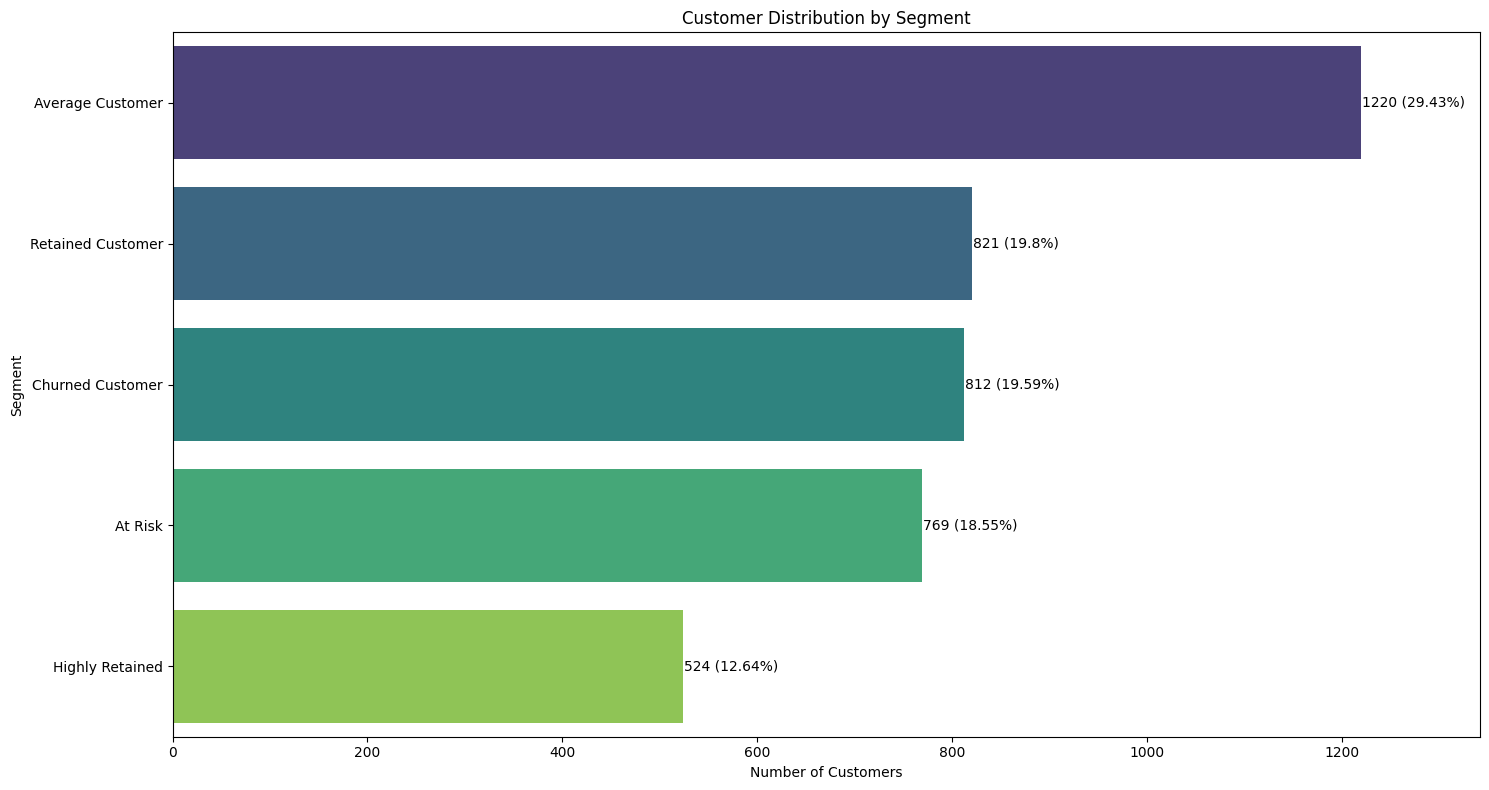

In [76]:
# Visualization: Customer Distribution by Segment
plt.figure(figsize = (15, 8))
sns.barplot(y = 'Segment', x = 'CustomerCounts', data = segment_counts,
            palette = 'viridis', order = segment_counts.sort_values('CustomerCounts', ascending = False)['Segment'])

# Add labels for counts and percentages on each bar
for i, row in segment_counts.iterrows():
    plt.text(row['CustomerCounts'] + 1, i, f"{row['CustomerCounts']} ({row['Percentage']}%)", va='center')

plt.title('Customer Distribution by Segment')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')
plt.xlim(0, segment_counts['CustomerCounts'].max() * 1.1)
plt.tight_layout()
plt.show()

The "Highly Retained" segment comprises only 524 customers (12.64%), suggesting that a relatively small portion of customers are consistently making frequent and high-value purchases. This emphasizes the need to strengthen customer retention strategies to increase long-term engagement.

A significant number of customers fall into the "At Risk" (18.55%) and "Churned Customer" (19.59%) segments, indicating potential revenue loss if no proactive actions are taken. These segments represent users who have reduced or completely stopped purchasing activities and may require reactivation campaigns.

The largest segment is the "Average Customer" group, representing 1,220 customers (29.43%). These customers display irregular shopping behavior and weak brand affinity. This group presents a strong opportunity to boost retention and conversion through targeted promotions, loyalty programs, or personalized marketing efforts.

Lastly, the "Retained Customer" segment makes up 19.80%, reflecting a moderate portion of the user base that could potentially be nurtured further into becoming highly retained customers.

## New Customers

In [50]:
# Add order_month column extracted from InvoiceDate
data['order_month'] = data['InvoiceDate'].dt.to_period('M')

In [51]:
# Identify the first purchase month for each customer
min_purchase = data.groupby('CustomerID')['order_month'].min().reset_index()
min_purchase.columns = ['CustomerID', 'first_purchase_month']

In [52]:
min_purchase.head(10)

,CustomerID,first_purchase_month
0,12347.0,2010-12
1,12348.0,2010-12
2,12349.0,2011-11
3,12350.0,2011-02
4,12352.0,2011-02
5,12353.0,2011-05
6,12354.0,2011-04
7,12355.0,2011-05
8,12356.0,2011-01
9,12357.0,2011-11


In [53]:
# Merge the first purchase info back into the original dataset
data = data.merge(min_purchase, on = 'CustomerID')

In [54]:
data.head()

,InvoiceNo,StockCode,yearmonth,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,MonthYear,year,month,quarter,order_month,first_purchase_month
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,4,2010-12,2010-12
1,536365,71053,201012,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,4,2010-12,2010-12
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,4,2010-12,2010-12
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,4,2010-12,2010-12
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,4,2010-12,2010-12


In [55]:
# Flag whether the transaction is the customer's first (new customer)
data['new_customer'] = data['order_month'] == data['first_purchase_month']

In [56]:
# Count the number of new customers per month
new_customers = data[data['new_customer']].groupby('order_month')['CustomerID'].nunique().reset_index()
new_customers.columns = ['order_month', 'new_customers']

In [57]:
new_customers.head()

,order_month,new_customers
0,2010-12,816
1,2011-01,398
2,2011-02,351
3,2011-03,430
4,2011-04,287


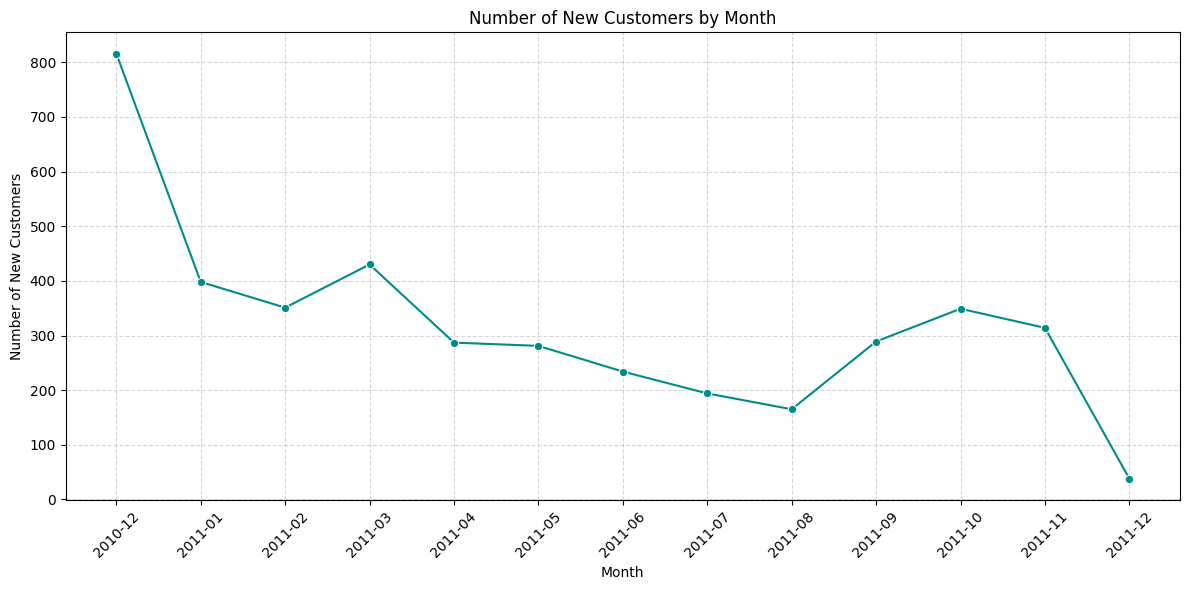

In [77]:
# Visualization: Number of New Customers per Month
plt.figure(figsize = (12, 6))
sns.lineplot(data = new_customers,  x = new_customers['order_month'].astype(str), y = 'new_customers', marker = 'o', color = 'darkcyan')
plt.title('Number of New Customers by Month')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation = 45)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

The chart illustrates the number of newly acquired customers who made their first purchase each month, spanning from December 2010 to December 2011. Overall, there is a declining trend in customer acquisition over the year.

The most dramatic drop occurred between December 2010 and January 2011, where the number of new customers decreased by more than half. While some fluctuations followed, the trend continued downward throughout the mid-year, with a slight recovery observed in September and October 2011.


# CRR Analysis

In [59]:
# Get unique customers per month
monthly_customers = data.groupby('MonthYear')['CustomerID'].unique()

In [60]:
# Convert the result into a DataFrame
monthly_customers = monthly_customers.to_frame()

In [61]:
# Calculate total unique customers per month
monthly_customers['TotalCustomers'] = monthly_customers['CustomerID'].apply(len)

In [62]:
# Initialize a list to store returning customers
returning_customers = []

# Calculate returning customers month-over-month
for i in range(len(monthly_customers)):
    if i == 0:
        returning_customers.append(0)  # No previous month to compare
    else:
        prev = set(monthly_customers.iloc[i-1]['CustomerID'])
        curr = set(monthly_customers.iloc[i]['CustomerID'])
        returning_customers.append(len(prev & curr))

# Add returning customers to the dataframe
monthly_customers['ReturningCustomers'] = returning_customers

In [63]:
# Calculate Customer Retention Rate (CRR)
monthly_customers['CRR'] = (monthly_customers['ReturningCustomers'] / monthly_customers['TotalCustomers'].shift(1)) * 100

In [64]:
monthly_customers[['TotalCustomers', 'ReturningCustomers', 'CRR']]

,TotalCustomers,ReturningCustomers,CRR
MonthYear,,,
2010-12,816,0,NaN
2011-01,687,289,35.416667
2011-02,683,226,32.896652
2011-03,893,244,35.724744
2011-04,787,255,28.555431
2011-05,982,315,40.025413
2011-06,921,367,37.372709
2011-07,886,333,36.156352
2011-08,855,341,38.487585


The CRR analysis reveals that the monthly customer retention rate throughout 2011 generally falls within the 30% to 40% range, which is considered a healthy benchmark for e-commerce platforms, according to industry standards.

While the CRR remained relatively stable, there was a noticeable dip in April 2011 (28.55%), followed by a significant increase in the subsequent months, reaching a peak of 43.29% in November 2011.

The sharp decline in December 2011 (21.33%) is likely due to incomplete transactional data for that month, which affects both the customer count and the calculated retention rate.

# Cohort Analysis

In [65]:
from operator import attrgetter

In [66]:
from matplotlib.colors import LinearSegmentedColormap

In [67]:
# Assign cohort_month based on each customer's first purchase date
data['cohort_month'] = data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [68]:
# Calculate cohort index
data['cohort_index'] = (data['order_month'] - data['cohort_month']).apply(attrgetter('n'))

In [69]:
# Calculate the number of unique customers for each cohort per month
cohort_data = data.groupby(['cohort_month', 'cohort_index'])['CustomerID'].nunique().reset_index()

In [70]:
# Pivot the data to create a cohort table
cohort_pivot = cohort_data.pivot(index = 'cohort_month', columns = 'cohort_index', values = 'CustomerID')

In [71]:
# Calculate retention rate by dividing by cohort size (month 0)
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis = 0)

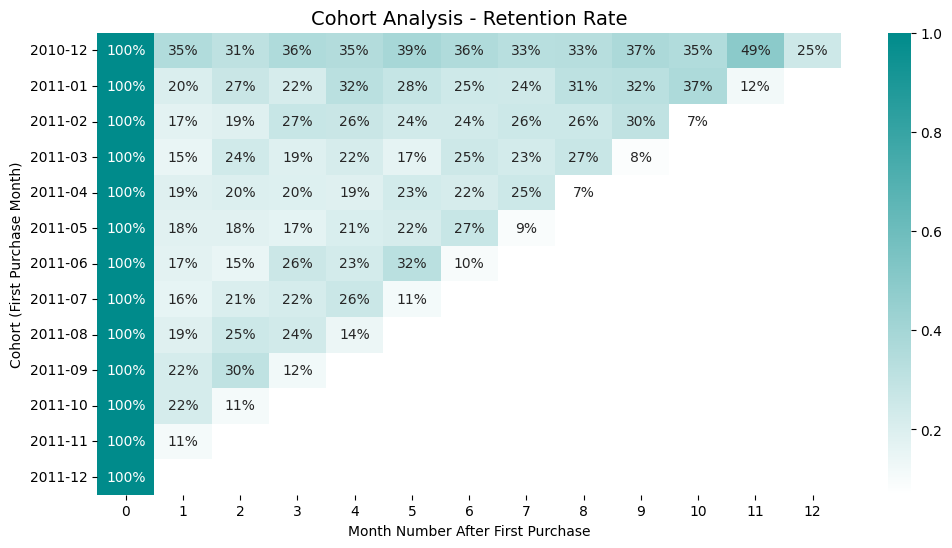

In [73]:
# Create a custom color map
colors = ["#ffffff", "darkcyan"]
cmap = LinearSegmentedColormap.from_list("custom_darkcyan", colors)

# Plot the retention heatmap
plt.figure(figsize=(12,6))
sns.heatmap(retention, annot = True, fmt = '.0%', cmap = cmap)
plt.title('Cohort Analysis - Retention Rate', fontsize = 14)
plt.xlabel('Month Number After First Purchase')
plt.ylabel('Cohort (First Purchase Month)')
plt.yticks(rotation = 0)
plt.show()

The cohort analysis visualization highlights that customers who made their first purchase in December 2010 (cohort 2010-12) show the highest retention rates across all cohorts. On average, this cohort maintained a monthly retention of 30–40%, with a notable peak at 49% retention in month 11 (November 2011).

In contrast, cohorts acquired in later months generally display lower and more rapidly declining retention rates.

# Key Insights
Based on the RFM analysis, only around 524 customers (12.64%) fall into the Highly Retained category—those who purchase frequently, recently, and with high monetary value. This indicates that the majority of customers do not engage in frequent repeat purchases in the short term.

However, the Customer Retention Rate (CRR) analysis shows that overall customer retention remains fairly strong, ranging between 30% and 40% per month. This suggests that although frequent repeat buyers are limited, a considerable portion of customers still return for repeat purchases, albeit at a lower frequency.

From the Cohort Analysis, it is evident that the December 2010 cohort has the strongest retention performance, maintaining over 30% retention across several months and peaking at 49% in month 11. In contrast, cohorts acquired in subsequent months show a faster decline in retention, highlighting potential gaps in customer engagement or onboarding processes.

# Recommended Actions
1. Collect and Analyze Customer Feedback

  Given the low proportion of customers in the Highly Retained category, it is important to understand what prevents customers from making repeat purchases. Gathering feedback, especially from one-time buyers, can uncover pain points in the customer journey—such as website usability, unclear promotions, or product dissatisfaction.

2. Segment and Target High-Potential Customers

  Leveraging RFM and Cohort insights, customers in the Medium segment (moderate frequency and monetary value) should be further segmented and targeted with tailored campaigns. This enables the marketing team to offer personalized deals or limited-time discounts to encourage repeat purchases.

3. Enhance Engagement for Medium RFM Segment

  Customers in the medium RFM category have the potential to become loyal if nurtured properly. Strategies such as personalized email campaigns, product recommendations based on past purchases, or point-based loyalty systems can gradually increase their engagement and retention.


4. Continuously Monitor and Evaluate Monthly Retention

  The cohort analysis reveals a rapid decline in retention after December 2010. This highlights the need for ongoing retention monitoring. I recommend developing a monthly retention dashboard to quickly identify negative trends and measure the impact of retention initiatives.

